# Imports

In [1]:
# General Imports
import numpy as np
import pandas as pd
import statistics
import pickle
import os
from IPython.display import display
from collections import Counter

# Fixing random state for reproducibility
np.random.seed(19680801)

# Fonctions customs
from packages.fonctions import addlabels, nan_detection, remove_duplicates

# Représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#!pip install squarify
import squarify
from math import pi
from collections import Counter

# Dates
import time
import datetime
from datetime import datetime
from datetime import timedelta

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import GridSearchCV

# Clustering
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

#!pip install kneed
from kneed import KneeLocator

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [2]:
# Choix d'une palette de couleurs

sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [3]:
# Créer listes vides pour stocker informations des différents essais

list_methode = []
list_variables = []
list_clients = []
list_n_clusters = []
list_silhouette_score = []

# Segmentation RFM

In [4]:
########## Import des données ##########

path = '' #-> en local
filepath = os.path.join(path, 'data/df_for_rfm')

with open(filepath, 'rb') as f:
    df_rfm = pickle.load(f)

df_rfm.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

           customer_city customer_state                          order_id  \
0                 franca             SP  00e7ee1b050b8499577073aeb2a297a1   
1  sao bernardo do campo             SP  29150127e6685892b6eab3eec79f59c7   
2              sao paulo             SP  b2059ed67ce144a36e2aa97d2c9e9ad2   
3        mogi das cruzes             SP  951670f92359f4fe4a63112aa7306eba   
4               campinas             SP  6b7d50bd145f6fc7f33cebabd7e49d0f   

  order_status order_purchase_timestamp  order_item_id  \
0    delivered      2017-05-16 15:05:35            1.0   
1    delivered      2018-01-12 20:48:24            1.0   
2    delivered      2018-05-19 16:07:45            1.0   
3    delivered      2018-03-13 16:06:38            1.0   
4    delivered      2018-07-29 09:51:30            1.0   

                         product_id                         seller_id   price  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab  124.99   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c  289.00   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab  139.94   
3  a5647c44af977b148e0a3a4751a09e2e  7c67e1448b00f6e969d365cea6b010ab  149.94   
4  9391a573abe00141c56e38d84d7d5b3b  4a3ca9315b744ce9f8e9374361493884  230.00   

   freight_value      seller_city seller_state  product_name_lenght  \
0          21.88  itaquaquecetuba           SP                 41.0   
1          46.48           itajai           SC                 43.0   
2          17.79  itaquaquecetuba           SP                 55.0   
3          23.36  itaquaquecetuba           SP                 48.0   
4          22.25         ibitinga           SP                 61.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                      1141.0                 1.0            8683.0   
1                      1002.0                 3.0           10150.0   
2                       955.0                 1.0            8267.0   
3                      1066.0                 1.0           12160.0   
4                       407.0                 1.0            5200.0   

   payment_sequential payment_type  payment_installments  payment_value  \
0                 1.0  credit_card                   2.0         146.87   
1                 1.0  credit_card                   8.0         335.48   
2                 1.0  credit_card                   7.0         157.73   
3                 1.0  credit_card                   1.0         173.30   
4                 1.0  credit_card                   8.0         252.25   

                          review_id  review_score  Nb_commandes  \
0  88b8b52d46df026a9d1ad2136a59b30b           4.0             1   
1  02fc48a9efa3e3d0f1a8ea26507eeec3           5.0             1   
2  5ad6695d76ee186dc473c42706984d87           5.0             1   
3  059a801bb31f6aab2266e672cab87bc5           5.0             1   
4  8490879d58d6c5d7773f2739a03f089a           5.0             1   

                             product_category  review_time  order_time  \
0  Travail de bureau, Industry & Construction     4.940741    8.812500   
1                             Maison & jardin    11.946863   16.661748   
2  Travail de bureau, Industry & Construction     0.507627   26.077153   
3  Travail de bureau, Industry & Construction     4.775544   14.998461   
4                             Maison & jardin     7.083241   11.461319   

   delivery_error_time  order_preparation_time  delivery_time  \
0           -10.558623                6.809549       1.991412   
1  

In [5]:
df_rfm.isna().sum()

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                      2963
order_status                  2963
order_purchase_timestamp      2963
order_item_id                 2963
product_id                    2963
seller_id                     2963
price                         2963
freight_value                 2963
seller_city                   2963
seller_state                  2963
product_name_lenght           4601
product_description_lenght    4601
product_photos_qty            4601
product_weight_g              2983
payment_sequential            2966
payment_type                  2966
payment_installments          2966
payment_value                 2966
review_id                     3824
review_score                  3824
Nb_commandes                     0
product_category              4624
review_time                   3824
order_time                    2971
delivery_error_time 

In [6]:
########## Total price ##########
# Prix total = prix unitaire * quantité
df_rfm['total_price'] = df_rfm['price'] * df_rfm['order_item_id']

########## Recency ##########
# Recency = nombre de jours écoulés depuis dernier achat
# convertir date en datetime
df_rfm['order_purchase_timestamp'] = pd.to_datetime(df_rfm['order_purchase_timestamp'])

# dataset pas super récent -> on prend la date max + 1 jour à la place de la date d'aujourd'hui
now = df_rfm['order_purchase_timestamp'].max() + timedelta(days = 1)

In [7]:
########## créer RFM dataframe ##########

rfm = df_rfm.groupby('customer_id').agg({
    'order_purchase_timestamp' : lambda day : (now - day.max()).days, # pour avoir temps écoulé depuis commande
    'order_id': lambda num : len(num), # nombre de commandes (fréquence)
    'total_price': lambda price : price.sum() # prix
})

# Renommer colonnes
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()

Recency  Frequency  Monetary
customer_id                                                   
00012a2ce6f8dcda20d059ce98491703    288.0          1     89.80
000161a058600d5901f007fab4c27140    410.0          1     54.90
0001fd6190edaaf884bcaf3d49edf079    548.0          1    179.99
0002414f95344307404f0ace7a26f1d5    379.0          1    149.90
000379cdec625522490c315e70c7a9fb    150.0          1     93.00

### Calculating RFM Score

In [8]:
rfm['Frequency'].unique()

array([ 1,  4,  2,  3,  6,  7,  5,  8, 10, 12, 11, 15, 38,  9, 16, 20, 63,
       24, 13, 21, 14, 26, 22, 19])

In [9]:
# les quantiles sont des points de données qui divisent un ensemble de données en des fractions égales

# calculer les quartiles
statistics.quantiles(rfm['Frequency'])

# calculer quintiles ?
statistics.quantiles(rfm['Frequency'], n = 5)

[1.0, 1.0, 1.0, 1.0]

In [10]:
rfm['Frequency'].value_counts()

1     86767
2      9631
3      1536
4       816
6       273
5       238
7        47
8        40
12       21
10       15
9        12
11       11
15        6
24        5
14        5
13        4
20        3
21        3
16        2
22        2
26        1
38        1
63        1
19        1
Name: Frequency, dtype: int64

In [11]:
print("Le nombre de clients ayant commandé plus d'une fois est de : {:.2f} %".format(100*sum(rfm['Frequency'] > 1)/len(rfm)))

Le nombre de clients ayant commandé plus d'une fois est de : 12.75 %


In [12]:
def plot_hist(rfm, figsize = (12, 7)):

    plt.figure(figsize = figsize)
    for i, col in enumerate(rfm):
        plt.subplot(len(rfm.columns), 1, i + 1)
        plt.hist(
            rfm[col],
            bins = int(1 + np.log2(len(rfm))),
            label = 'skweness : ' + str(round(rfm[col].skew(), 2)),
            density = True,
            color = '#8da0cb'
            )
        plt.ylabel("Nombre de clients (%)")
        plt.xlabel(col)
        plt.legend()
        plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
        plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
        plt.minorticks_on()
    plt.tight_layout()
    plt.show()

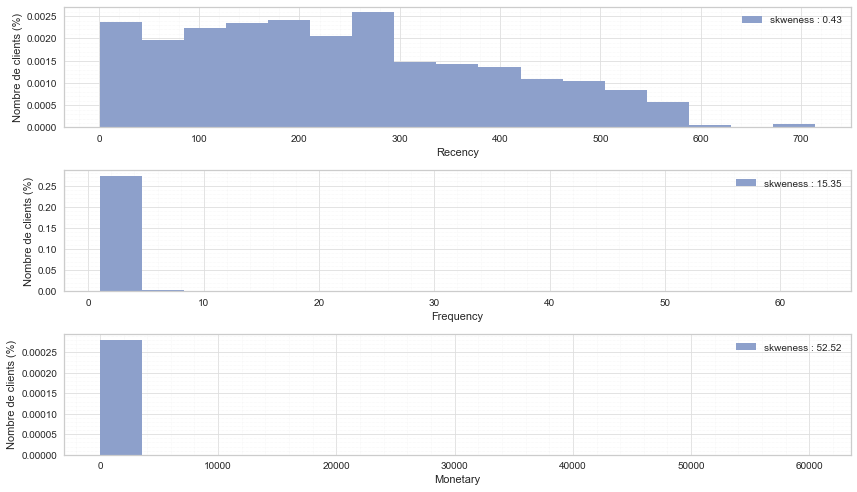

In [13]:
# Histogramme des variables 'Recency', 'Frequency' et 'Monetary'
plot_hist(rfm)

In [14]:
# Recency -> ok
# Frenquency et Monetary -> forte asymétrie
# passage au log pour corriger ça

rfm[['Frequency', 'Monetary']] = rfm[['Frequency', 'Monetary']].apply(lambda x: np.log(1 + x))

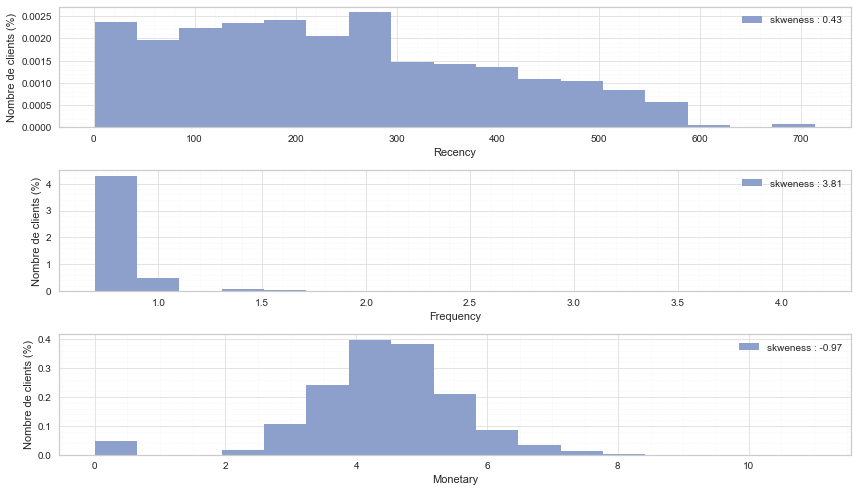

In [15]:
plot_hist(rfm)

In [16]:
# mieux - toujours pas fou pour frequency mais quand même mieux
# recency -> nombre inversés car plus c'est récent mieux c'est

In [17]:
# Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

# qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles.
# For example, 1000 values for 5 quantiles would produce a categorical object indicating quantile membership for
# each customer

"""

rfm["R"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4, 3, 2, 1])
rfm["F"] = pd.qcut(rfm["Frequency"], 5, labels = [1, 2, 3, 4, 5])
rfm["M"] = pd.qcut(rfm["Monetary"], 5, labels = [1, 2, 3, 4, 5])
rfm["RFM_Score"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

rfm.head()

"""

# -> ne fonctionne pas
# ValueError: Bin edges must be unique: array([0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718, 4.15888308]).

'\n\nrfm["R"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4, 3, 2, 1])\nrfm["F"] = pd.qcut(rfm["Frequency"], 5, labels = [1, 2, 3, 4, 5])\nrfm["M"] = pd.qcut(rfm["Monetary"], 5, labels = [1, 2, 3, 4, 5])\nrfm["RFM_Score"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)\n\nrfm.head()\n\n'

In [18]:
# autre méthode :

def r_score(x, quintiles):
    """
    Attribue une note entre 1 et 5 suivant l'emplacement de x par
    rapport aux quintiles. Plus la 'Recency' est faible, plus la note
    est élevé
    x(float): valeur
    quintiles(dict): voir fonction calculQuantile
    """

    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1


def fm_score(x, quintiles, c):
    """
    Attribue une note entre 1 et 5 suivant l'emplacement de x par
    rapport aux quintiles. Plus x est grand, plus la note est grande
    x(float): valeur
    quintiles(dict): voir fonction calculate_quantile
    """

    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5


def calculate_quantile(rfm):
    """
    Calcul des quantiles pour chaque variable Recency, Frequency et Monetary
    puis attribue un score (fm_score et r_score) suivant la valeur
    des variables de chaque individu
    rfm(pd.DataFrame): présente les colonnes 'Recency', 'Frequency' et Monetary
    """
    quintiles = rfm[[
        'Recency',
        'Frequency',
        'Monetary'
        ]].quantile([.2, .4, .6, .8]).to_dict()

    rfm['R'] = rfm['Recency'].apply(lambda x:
                                    r_score(x, quintiles))
    rfm['F'] = rfm['Frequency'].apply(lambda x:
                                      fm_score(x, quintiles, 'Frequency'))
    rfm['M'] = rfm['Monetary'].apply(lambda x:
                                     fm_score(x, quintiles, 'Monetary'))
    return rfm

In [19]:
# Calcul des quantiles
calculate_quantile(rfm)

Recency  Frequency  Monetary  R  F  M
customer_id                                                            
00012a2ce6f8dcda20d059ce98491703    288.0   0.693147  4.508659  2  1  3
000161a058600d5901f007fab4c27140    410.0   0.693147  4.023564  1  1  2
0001fd6190edaaf884bcaf3d49edf079    548.0   0.693147  5.198442  1  1  4
0002414f95344307404f0ace7a26f1d5    379.0   0.693147  5.016617  2  1  4
000379cdec625522490c315e70c7a9fb    150.0   0.693147  4.543295  4  1  3
...                                   ...        ...       ... .. .. ..
fffecc9f79fd8c764f843e9951b11341    153.0   1.386294  5.110179  4  5  4
fffeda5b6d849fbd39689bb92087f431    100.0   0.693147  3.889777  4  1  2
ffff42319e9b2d713724ae527742af25     77.0   0.693147  5.302807  5  1  5
ffffa3172527f765de70084a7e53aae8    362.0   1.098612  3.517498  2  5  1
ffffe8b65bbe3087b653a978c870db99      NaN   0.693147  0.000000  1  1  1

[99441 rows x 6 columns]

In [20]:
rfm.isna().sum()

Recency      2963
Frequency       0
Monetary        0
R               0
F               0
M               0
dtype: int64

In [21]:
#### attention, données manquantes !...

In [22]:
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [23]:
plt.figure(figsize = (20, 7))
plt.plot(rfm.groupby('RFM_Score').agg('Recency').mean())
plt.xticks(rotation = 90)
plt.title('RFM score agg by recency', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

### Interprétation de la segmentation

In [24]:
# exemples d'interprétation des segments RFM

#R=5, F=5, M=5 — they pay often, a lot and recently. The most loyal and active users.
#R=1, F=1, M=1 – they pay little, rarely and for a long time. Most likely lost customers. It may not be worth taking action to return them if the cost of attraction is higher than the expected profit.
#R=1/2, F=4/5, M=4/5 — loyal users on the verge of leaving. We offer them a bonus, a discount and try to return them.
#R=4/5, F=1, M=1/2/3/4/5 — Users have recently made a payment. We try to encourage them to buy more.

In [25]:
# use Recency and Frequency to segment our customers
# 10 segments based on the R and F scores

seg_map = {
    r'[1-2][1-2]': 'Hibernating', # Last purchase was long back and low number of orders. May be lost
    r'[1-2][3-4]': 'At Risk', # Purchased often but a long time ago. Need to bring them back!
    r'[1-2]5': 'Can\'t Loose', # Used to purchase frequently but haven’t returned for a long time
    r'3[1-2]': 'About to Sleep', # Below average recency and frequency. Will lose them if not reactivated
    r'33': 'Need Attention', # Above average recency, frequency and monetary values. May not have bought very recently though
    r'[3-4][4-5]': 'Loyal Customers', # Buy on a regular basis. Responsive to promotions
    r'41': 'Promising', # Recent shoppers, but haven’t spent much
    r'51': 'New Customers', # Bought most recently, but not often
    r'[4-5][2-3]': 'Potential Loyalists', # Recent customers with average frequency
    r'5[4-5]': 'Champions'    # Bought recently, buy often and spend the most
}

In [26]:
# determiner comment segmenter les clients en utilisant regex

rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex = True)
rfm.head()

Recency  Frequency  Monetary  R  F  M  \
customer_id                                                               
00012a2ce6f8dcda20d059ce98491703    288.0   0.693147  4.508659  2  1  3   
000161a058600d5901f007fab4c27140    410.0   0.693147  4.023564  1  1  2   
0001fd6190edaaf884bcaf3d49edf079    548.0   0.693147  5.198442  1  1  4   
0002414f95344307404f0ace7a26f1d5    379.0   0.693147  5.016617  2  1  4   
000379cdec625522490c315e70c7a9fb    150.0   0.693147  4.543295  4  1  3   

                                 RFM_Score      Segment  
customer_id                                              
00012a2ce6f8dcda20d059ce98491703       213  Hibernating  
000161a058600d5901f007fab4c27140       112  Hibernating  
0001fd6190edaaf884bcaf3d49edf079       114  Hibernating  
0002414f95344307404f0ace7a26f1d5       214  Hibernating  
000379cdec625522490c315e70c7a9fb       413    Promising

In [27]:
# Grouper par cluster
group = rfm.groupby('Segment').mean().sort_values('Monetary')
group

Recency  Frequency  Monetary         R    F         M
Segment                                                                  
Hibernating      397.336449   0.693147  4.043023  1.458833  1.0  2.718401
About to Sleep   223.170885   0.693147  4.388251  3.000000  1.0  2.873512
New Customers     46.256940   0.693147  4.412170  5.000000  1.0  2.897848
Promising        138.100550   0.693147  4.433659  4.000000  1.0  2.928829
Can't Loose      395.996097   1.219901  5.364228  1.506506  5.0  4.126766
Loyal Customers  178.938767   1.214212  5.400535  3.507930  5.0  4.207187
Champions         48.582361   1.211288  5.404423  5.000000  5.0  4.185906

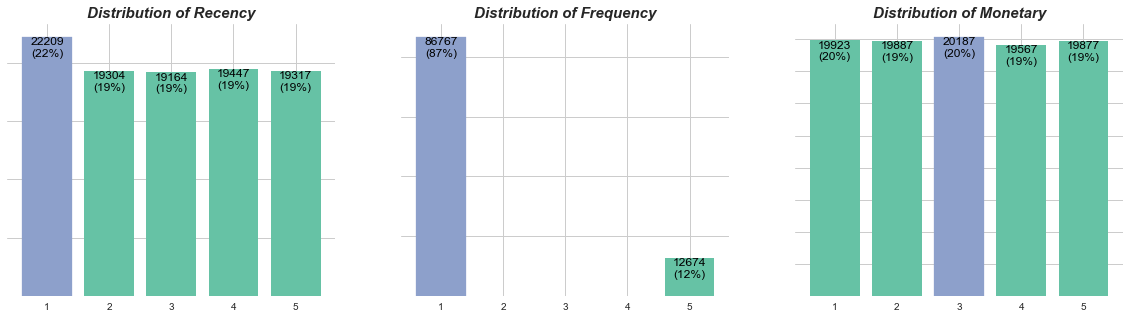

In [28]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

for i, p in enumerate(['R', 'F', 'M']):
    parameters = {'R':'Recency', 'F':'Frequency', 'M':'Monetary'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y)
    ax.set_frame_on(False)
    ax.tick_params(left = False, labelleft = False, bottom = False)
    ax.set_title('Distribution of {}'.format(parameters[p]), fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('#8da0cb')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha = 'center',
               va = 'top',
               color = 'black')

plt.show()

In [29]:
# recency et monetary sont distribués de façon relativement homogènes
# par contre frequency pas du tout

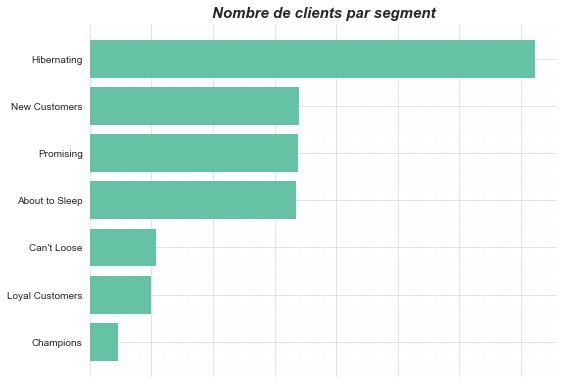

In [30]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending = True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)), segments_counts)
ax.set_frame_on(False)
ax.tick_params(left = False, bottom = False, labelbottom = False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)
plt.title('Nombre de clients par segment', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()

for i, bar in enumerate(bars):
    value = bar.get_width()
    if segments_counts.index[i] in ['champions', 'loyal customers']:
        bar.set_color('#8da0cb')
        ax.text(
            value,
            bar.get_y() + bar.get_height()/2,
            '{:,} ({:}%)'.format(int(value), int(value*100/segments_counts.sum())),
            va = 'center',
            ha = 'left'
            )

plt.show()

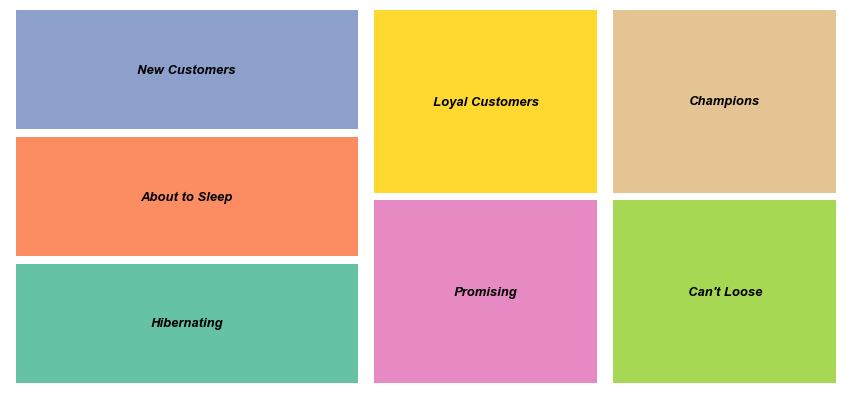

In [31]:
# Isoler valeurs et labels des clusters
values = group.index.value_counts().values
labels = group.index.value_counts().index

# Squarify plot
plt.figure(figsize = (15, 7))
squarify.plot(
    values,
    label = labels,
    text_kwargs = {'fontsize': 13, 'color': 'black', 'fontstyle' : 'italic', 'weight' : 'bold'},
    pad = 0.10,
    color = sns.color_palette('Set2', len(values))
    )
plt.axis('off')
plt.show()

In [32]:
# Liste des fonctions d'aggrégation
func = ['count', 'min', 'mean', 'median', 'max', 'std']

# Regroupement des données
qtd_preco = rfm.groupby(['Segment'])

# Aggrégation des données par différentes fonctions
summery_table = qtd_preco[['Recency', 'Frequency', 'Monetary']].agg(func)

# Affichage de la table de résumé
summery_table

Recency                                             Frequency  \
                  count    min        mean median    max        std     count   
Segment                                                                         
About to Sleep    16713  181.0  223.170885  222.0  270.0  26.486846     16713   
Can't Loose        5380  271.0  395.996097  384.0  714.0  93.238863      5380   
Champions          2313    1.0   48.582361   45.0   95.0  26.152604      2313   
Hibernating       33170  271.0  397.336449  386.0  696.0  92.890448     36133   
Loyal Customers    4981   96.0  178.938767  179.0  270.0  48.964679      4981   
New Customers     17004    1.0   46.256940   42.0   95.0  26.047456     17004   
Promising         16917   96.0  138.100550  137.0  180.0  24.138933     16917   

                                                                  Monetary  \
                      min      mean    median       max       std    count   
Segment                                                                      
About to Sleep   0.693147  0.693147  0.693147  0.693147  0.000000    16713   
Can't Loose      1.098612  1.219901  1.098612  4.158883  0.260695     5380   
Champions        1.098612  1.211288  1.098612  3.091042  0.239663     2313   
Hibernating      0.693147  0.693147  0.693147  0.693147  0.000000    36133   
Loyal Customers  1.098612  1.214212  1.098612  3.218876  0.246724     4981   
New Customers    0.693147  0.693147  0.693147  0.693147  0.000000    17004   
Promising        0.693147  0.693147  0.693147  0.693147  0.000000    16917   

                                                                    
                      min      mean    median        max       std  
Segment                                                             
About to Sleep   1.383791  4.388251  4.394326   8.213653  0.886237  
Can't Loose      2.240710  5.364228  5.290889  11.010085  0.971301  
Champions        1.686399  5.404423  5.351716   9.792612  0.973622  
Hibernating      0.000000  4.043023  4.261270   8.815222  1.494619  
Loyal Customers  2.541602  5.400535  5.364573   9.952325  0.945327  
New Customers    1.386294  4.412170  4.393214   8.814330  0.907734  
Promising        0.615186  4.433659  4.446174   8.318984  0.911562

In [33]:
rfm = rfm.drop(['R', 'F', 'M', 'RFM_Score'], axis = 1)
rfm

Recency  Frequency  Monetary  \
customer_id                                                      
00012a2ce6f8dcda20d059ce98491703    288.0   0.693147  4.508659   
000161a058600d5901f007fab4c27140    410.0   0.693147  4.023564   
0001fd6190edaaf884bcaf3d49edf079    548.0   0.693147  5.198442   
0002414f95344307404f0ace7a26f1d5    379.0   0.693147  5.016617   
000379cdec625522490c315e70c7a9fb    150.0   0.693147  4.543295   
...                                   ...        ...       ...   
fffecc9f79fd8c764f843e9951b11341    153.0   1.386294  5.110179   
fffeda5b6d849fbd39689bb92087f431    100.0   0.693147  3.889777   
ffff42319e9b2d713724ae527742af25     77.0   0.693147  5.302807   
ffffa3172527f765de70084a7e53aae8    362.0   1.098612  3.517498   
ffffe8b65bbe3087b653a978c870db99      NaN   0.693147  0.000000   

                                          Segment  
customer_id                                        
00012a2ce6f8dcda20d059ce98491703      Hibernating  
000161a058600d5901f007fab4c27140      Hibernating  
0001fd6190edaaf884bcaf3d49edf079      Hibernating  
0002414f95344307404f0ace7a26f1d5      Hibernating  
000379cdec625522490c315e70c7a9fb        Promising  
...                                           ...  
fffecc9f79fd8c764f843e9951b11341  Loyal Customers  
fffeda5b6d849fbd39689bb92087f431        Promising  
ffff42319e9b2d713724ae527742af25    New Customers  
ffffa3172527f765de70084a7e53aae8      Can't Loose  
ffffe8b65bbe3087b653a978c870db99      Hibernating  

[99441 rows x 4 columns]

In [34]:
rfm = rfm.reset_index(drop = True)
rfm

Recency  Frequency  Monetary          Segment
0        288.0   0.693147  4.508659      Hibernating
1        410.0   0.693147  4.023564      Hibernating
2        548.0   0.693147  5.198442      Hibernating
3        379.0   0.693147  5.016617      Hibernating
4        150.0   0.693147  4.543295        Promising
...        ...        ...       ...              ...
99436    153.0   1.386294  5.110179  Loyal Customers
99437    100.0   0.693147  3.889777        Promising
99438     77.0   0.693147  5.302807    New Customers
99439    362.0   1.098612  3.517498      Can't Loose
99440      NaN   0.693147  0.000000      Hibernating

[99441 rows x 4 columns]

In [35]:
########## Radar plot ##########

# Lister les catégories de clients
categories = rfm['Segment'].unique()

# Liste des couleurs pour chaque segment
palette_1 = sns.color_palette('Set2', len(categories))
colors_1 = {label: color for label, color in zip(categories, palette_1.as_hex())}
colors = colors_1

# Définir la taille du graph (nombre de subplots)
sub_plot = [4, 4]

# Aggrégation par moyenne des valeurs par segment
df_plot = rfm.groupby(['Segment']).agg('mean')

# Transformation MinMax -> [0, 1]
df_plot_std = pd.DataFrame(
    MinMaxScaler().fit_transform(df_plot),
    columns = list(df_plot.columns),
    index = df_plot.index
    )

# Noms des variables
categories = list(df_plot.columns)
# Nombre de variables
N = len(categories)

# Quel sera l'angle de chaque axe ?
# On divise un tour complet par le nombre de variables
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(1, figsize = (27, 20))

# Trace un radar chart pour chaque segment
for i, segment in enumerate(rfm['Segment'].unique()):
    ax = fig.add_subplot(sub_plot[0], sub_plot[1], i + 1, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    plt.yticks(color = 'grey', size = 2)
    values = list(df_plot_std.loc[segment].values)
    values += values[:1]
    ax.plot(angles, values, colors[segment], 'o-', linewidth = 2, linestyle = 'solid')
    ax.fill(angles, values, colors[segment], alpha = 0.25)
    ax.set_xticks(angles)
    plt.yticks(
        [-1, -0.5, 0, 0.5, 1],
        ['-1', '-0.5', '0', '0.5', '1'],
        color = 'black',
        size = 12
        )
    ax.set_title(segment, size = 15, color = colors[segment])
    ax.grid(True)
    plt.ylim(-1, 1)

plt.show()

In [36]:
########## CONCLUSION ##########

# interessant mais :
# - statique/figé -> on suppose que les clients segmentés vont maintenir leurs habitudes de consommation,
# qu'ils vont se comporter dans le futur comme ils se sont comportés dans le passé
# - méthode uniquement descriptive, ne fournit pas un moyen de prévision (contrairement à un modèle prédictif)

# frequence -> très faible pourcentage qui commande plus d'une fois donc pas
# avoir 5 groupes homogènes pour la fréquence -> super desequilibré

list_methode.append('RFM')
list_variables.append(df_rfm.shape[1])
list_clients.append(df_rfm.shape[0])
list_n_clusters.append(7)
list_silhouette_score.append(None)

# Autres méthodes de segmentation -> clustering

## Import des données avec d'autres variables

In [37]:
########## Import des données ##########

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

filepath = os.path.join(path, 'data/df')

with open(filepath, 'rb') as f:
    df_final = pickle.load(f)

df_final.head()

product_name_lenght  product_description_lenght  product_photos_qty  \
0             1.167257                    0.647319           -0.733865   
1             0.957866                    1.327616            1.127941   
2             1.062562                   -0.487068           -0.733865   
3             1.271953                   -0.537336           -0.733865   
4            -0.821955                   -0.590956           -0.113263   

   product_weight_g  payment_sequential  payment_installments  payment_value  \
0         -0.365812           -0.143138              0.072079      -0.658141   
1          1.305305           -0.143138              0.072079      -0.377872   
2         -0.276487           -0.143138              0.859505      -0.230308   
3         -0.537018           -0.143138             -0.715348      -0.541615   
4         -0.443599           -0.143138              0.859505       0.126602   

   review_score  review_time  order_time  delivery_error_time  \
0     -1.725903     0.205285   -0.322790            -0.512780   
1      0.685295    -0.253485    1.630269             0.304691   
2     -2.529636    -0.272668   -1.216744            -1.169459   
3      0.685295    -0.208044   -0.451719            -0.215734   
4     -0.118437    -0.243696    0.345692            -0.670216   

   order_preparation_time  shipping_limit_respect    review  distance  \
0                1.001188                1.086596  0.724822 -0.783157   
1               -0.464521                0.375678 -0.786379  0.513163   
2               -0.201061                1.140727  0.724822 -1.090666   
3               -0.712737                0.602305 -0.786379 -0.299902   
4                0.588430               -0.191630  0.724822  0.208500   

   Nb_commandes  order_item_id customer_city customer_state  payment_type  \
0     -0.277944       1.443171             0              1             1   
1     -0.277944      -0.292940             0              1             1   
2     -0.277944       1.443171             0              0             1   
3     -0.277944      -0.292940             0              0             1   
4     -0.277944      -0.292940             0              1             1   

   purchase_year  purchase_month  purchase_dayofweek  purchase_day  \
0         2017.0             7.0                 2.0          19.0   
1         2018.0             2.0                 2.0          14.0   
2         2018.0             5.0                 5.0          26.0   
3         2017.0             4.0                 0.0           3.0   
4         2018.0             6.0                 0.0          11.0   

   purchase_hour  product_category_Eletronique et Divertissement  \
0           14.0                                               0   
1           11.0                                               0   
2           12.0                                               0   
3           23.0                                               1   
4           13.0                                               1   

   product_category_Fashion, Beauté & Santé  product_category_Maison & jardin  \
0                                         0                                 1   
1                                         1                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   

   product_category_Travail de bureau, Industry & Construction  
0                                                  0            
1                                                  0            
2                                                  1            
3                                                  0            
4                                                  0

In [38]:
df_final.shape

(86120, 29)

# Réduction du jeu de données

In [39]:
# 29 variables -> beaucoup
# but de notre clustering -> pouvoir définir des clusters de clients et expliquer/caractériser leur comportement
# sera difficilement faisable avec 29 variables
# selectionner quelques variables (moins d'une dizaine) afin d'avoir un résultat clair

## Choix variables

In [40]:
# Lister les colonnes du df
df_final.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'review', 'distance', 'Nb_commandes',
       'order_item_id', 'customer_city', 'customer_state', 'payment_type',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'product_category_Eletronique et Divertissement',
       'product_category_Fashion, Beauté & Santé',
       'product_category_Maison & jardin',
       'product_category_Travail de bureau, Industry & Construction'],
      dtype='object')

In [41]:
df_final.reset_index(drop = True, inplace = True)

In [42]:
########## Reconstitution de la date d'achat ##########
df_final['Date_achat'] = df_final.apply(lambda row: datetime.strptime(f'{int(row.purchase_year)}-{int(row.purchase_month)}-{int(row.purchase_day)}', '%Y-%m-%d'), axis = 1)
df_final['Date_achat']

0       2017-07-19
1       2018-02-14
2       2018-05-26
3       2017-04-03
4       2018-06-11
           ...    
86115   2018-01-26
86116   2017-06-04
86117   2018-04-13
86118   2018-07-22
86119   2018-03-28
Name: Date_achat, Length: 86120, dtype: datetime64[ns]

In [43]:
########## Choix des variables (d'après résultats de l'analyse exploratoire) ##########

df_reduit = df_final[[
    #'product_name_lenght',
    #'product_description_lenght',
    #'product_photos_qty',
    'product_weight_g',
    'payment_sequential',
    #'payment_installments',
    'payment_value',
    #'review_score',
    #'review_time',
    #'order_time',
    #'delivery_error_time',
    #'order_preparation_time',
    #'shipping_limit_respect',
    'review',
    'distance',
    'Nb_commandes',
    'order_item_id',
    'customer_city',
    #'customer_state',
    'payment_type',
    #'purchase_year',
    #'purchase_month',
    #'purchase_dayofweek',
    #'purchase_day',
    #'purchase_hour',
    #'product_category_Eletronique et Divertissement',
    #'product_category_Fashion, Beauté & Santé',
    #'product_category_Maison & jardin',
    #'product_category_Travail de bureau, Industry & Construction'
    ]]

df_reduit.reset_index(drop = True, inplace = True)
df_reduit.shape

(86120, 9)

In [44]:
df_reduit

product_weight_g  payment_sequential  payment_value    review  \
0             -0.365812           -0.143138      -0.658141  0.724822   
1              1.305305           -0.143138      -0.377872 -0.786379   
2             -0.276487           -0.143138      -0.230308  0.724822   
3             -0.537018           -0.143138      -0.541615 -0.786379   
4             -0.443599           -0.143138       0.126602  0.724822   
...                 ...                 ...            ...       ...   
86115         -0.592846           -0.143138      -0.651689 -0.786379   
86116         -0.555627           -0.143138      -0.144086 -0.786379   
86117         -0.564932           -0.143138      -0.660096 -0.786379   
86118         -0.558977           -0.143138      -0.045401  0.724822   
86119         -0.537018           -0.143138      -0.031324 -0.786379   

       distance  Nb_commandes  order_item_id customer_city  payment_type  
0     -0.783157     -0.277944       1.443171             0             1  
1      0.513163     -0.277944      -0.292940             0             1  
2     -1.090666     -0.277944       1.443171             0             1  
3     -0.299902     -0.277944      -0.292940             0             1  
4      0.208500     -0.277944      -0.292940             0             1  
...         ...           ...            ...           ...           ...  
86115  0.207159     -0.277944      -0.292940             0             1  
86116  0.041557     -0.277944      -0.292940             0             1  
86117 -1.115925     -0.277944      -0.292940             0             1  
86118  0.761126     -0.277944      -0.292940             0             1  
86119 -0.004289     -0.277944      -0.292940             0             1  

[86120 rows x 9 columns]

## df_sampled

In [45]:
# Certains algorithmes de clustering qu'on veut tester sont complexes -> jeu de données trop gros -> erreurs ("kernel crashed...")
# Test avec un échantillon de 10% :
df_sampled = df_reduit.sample(frac = 0.1, axis = 0)
df_sampled.reset_index(drop = True, inplace = True)
df_sampled.head()

product_weight_g  payment_sequential  payment_value    review  distance  \
0         -0.574236           -0.143138      -0.672755 -0.786379  0.979350   
1         -0.378839           -0.143138      -0.025947 -0.786379 -0.229303   
2         -0.518408           -0.143138      -0.239106 -0.786379 -0.503987   
3         -0.406752            1.979736      -0.363306 -0.786379 -0.286663   
4         -0.544461           -0.143138      -0.643037 -0.786379 -1.016612   

   Nb_commandes  order_item_id customer_city  payment_type  
0     -0.277944       -0.29294             0             0  
1      0.936986       -0.29294             0             1  
2     -0.277944       -0.29294             1             1  
3     -0.277944       -0.29294             0             1  
4     -0.277944       -0.29294             0             1

## Kmeans

### GridsearchCV

In [46]:
%%time

########## GRIDSEARCH CV ##########
# -> construit une grille de modèles avec toutes les combinaisons d'hyperparamètres présents dans "param_grid"

# début de l'execution
start = time.time()

# Définir les paramètres à tester
param_grid = {
    'n_clusters' : range(2, 9),
    'n_init': [5, 10, 15], # nb d'initialisations qu'on veut faire - 10 = valeur par défaut
    'max_iter': [100, 200, 300, 400, 500], # nb d'itérations max - par défaut 300
    'init' : ['k-means++', 'random'], # quelle stratégie d'initialisation on utilise
    'tol' : [0.0001, 0.001, 0.01],
    'algorithm' : ['auto', 'full', 'elkan'],
    'random_state' : [0, 42, 100]
    }

# K-Means++ -> méthode d'initialisation qui consiste à placer les centroïdes sur des points du dataset éloignés les uns des autres - facilite convergence

# Créer l'objet Kmeans
kmeans = KMeans(random_state = 42)

# Grid Search CV
grid = GridSearchCV(
    kmeans,
    param_grid,
    cv = 5,
    verbose = 1,
    n_jobs = -1
    )

# Fit sur les données
grid.fit(df_reduit)

# fin de l'execution
end = time.time()
temps = end - start

# Meilleur score obtenu: best_score_
print(f'\nBest score = {grid.best_score_}')

# Optimal hyperparameters: best_params_
print(f'Best parameters = {grid.best_params_}')

# Nombre optimal de clusters
print('Nombre optimal de clusters = ' + str(grid.best_params_['n_clusters']))

Fitting 5 folds for each of 5670 candidates, totalling 28350 fits

Best score = -54441.2220438011
Best parameters = {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 8, 'n_init': 15, 'random_state': 100, 'tol': 0.01}
Nombre optimal de clusters = 8
CPU times: user 2min 34s, sys: 1min 6s, total: 3min 41s
Wall time: 1h 9min 54s


In [47]:
# to do -> faire une fonction gridsearch pour pouvoir la réutiliser facilement les prochaines fois

### Choix du K optimal

In [48]:
%%time

# KElbowVisualizer - 'distortion' metric (default metric)
# Instantiate the clustering model and visualizer
model = KMeans()
d_visualizer = KElbowVisualizer(
    model,
    k = (3, 9),
    size = (1080, 500),
    metric = 'distortion'
    )

# Fit the data to the visualizer
d_visualizer.fit(df_reduit)
#d_visualizer.fit(df_final.drop(['Date_achat'], axis = 1))

# Finalize and render the figure
d_visualizer.show()

CPU times: user 1min 10s, sys: 35 s, total: 1min 45s
Wall time: 30.8 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

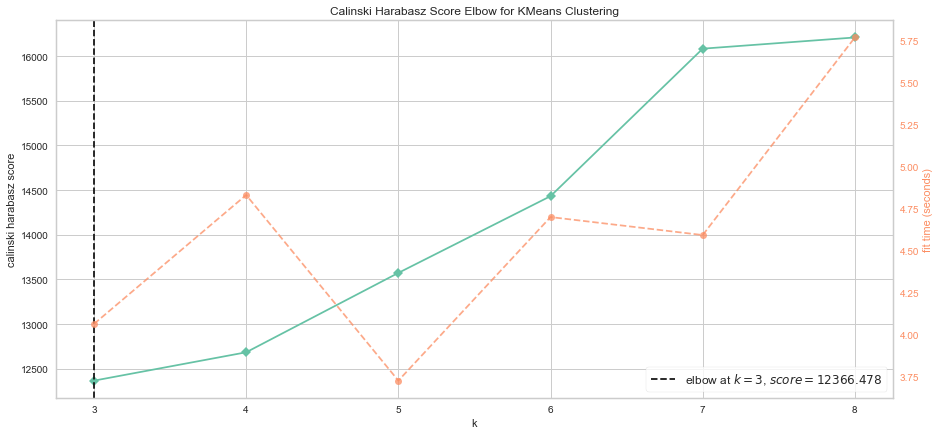

CPU times: user 1min 7s, sys: 29.4 s, total: 1min 36s
Wall time: 28.4 s


<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [49]:
%%time

# KElbowVisualizer - 'calinski_harabasz' metric
# Instantiate the clustering model and visualizer
model = KMeans()
ch_visualizer = KElbowVisualizer(
    model,
    k = (3, 9),
    size = (1080, 500),
    metric = 'calinski_harabasz'
    )

# Fit the data to the visualizer
ch_visualizer.fit(df_reduit)
#ch_visualizer.fit(df_final.drop(['Date_achat'], axis = 1))

# Finalize and render the figure
ch_visualizer.show()

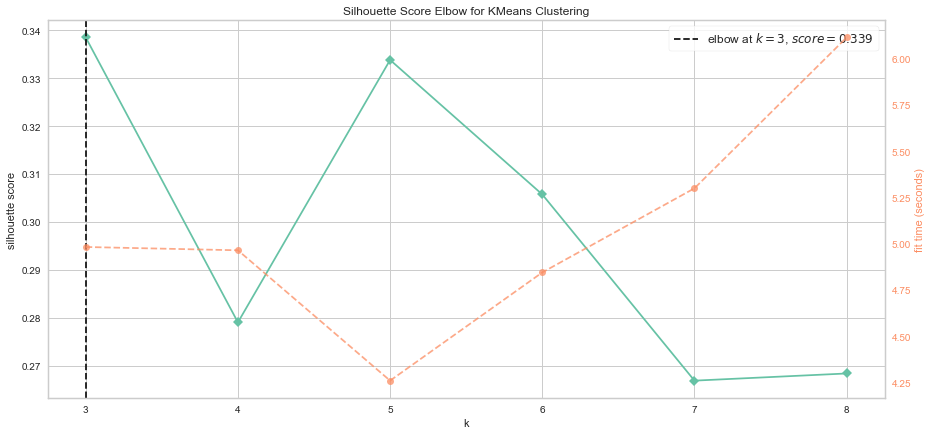

CPU times: user 15min 21s, sys: 3min 46s, total: 19min 8s
Wall time: 9min 8s


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [50]:
%%time

# KElbowVisualizer - 'silhouette' metric (le plus long)
# Instantiate the clustering model and visualizer
model = KMeans()
s_visualizer = KElbowVisualizer(
    model,
    k = (3, 9),
    size = (1080, 500),
    metric = 'silhouette'
    )

# Fit the data to the visualizer
s_visualizer.fit(df_reduit)
#s_visualizer.fit(df_final.drop(['Date_achat'], axis = 1))

# Finalize and render the figure
s_visualizer.show()

In [51]:
# Comparer le k optimal des différentes métriques :

# distortion
k_distortion = d_visualizer.elbow_value_
print(f'Nombre optimal de clusters - distortion metric : k = {k_distortion}')

# calinski harabasz
k_calinski_harabasz = ch_visualizer.elbow_value_
print(f'Nombre optimal de clusters - calinski harabasz metric : k = {k_calinski_harabasz}')

# silhouette
k_silhouette = s_visualizer.elbow_value_
print(f'Nombre optimal de clusters - silhouette metric : k = {k_silhouette}')

Nombre optimal de clusters - distortion metric : k = None
Nombre optimal de clusters - calinski harabasz metric : k = 3
Nombre optimal de clusters - silhouette metric : k = 3


In [52]:
########## Choix de k ##########
k = 3

## KMeans

In [53]:
# Best parameters = {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 8, 'n_init': 10, 'random_state': 0, 'tol': 0.01}

In [54]:
%%time

# Entrainer le modèle en utilisant les paramètres définis grace aux tests précedants (coude, silhouette, gridsearch)
model = KMeans(
    n_clusters = k, # nb de clusters qu'on veut avoir
    n_init = 10, # nb d'initialisations qu'on veut faire - 10 = valeur par défaut
    max_iter = 100, # nb d'itérations max - par défaut 300
    init = 'k-means++', # quelle stratégie d'initialisation on utilise
    tol = 0.01,
    algorithm = 'auto',
    random_state = 0
    )

# Entrainer le modèle
model.fit(df_reduit)
model.predict(df_reduit)

CPU times: user 7.94 s, sys: 5.24 s, total: 13.2 s
Wall time: 3.34 s


array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [55]:
# Centroids (= centres des clusters)
centroids = model.cluster_centers_
print(f'Shape des centroides : {centroids.shape}')

centroids

Shape des centroides : (3, 9)


array([[-2.89206446e-01,  5.87356258e-03, -1.56289557e-01,
        -8.87232073e-02,  1.36542491e-02, -1.30208058e-01,
         1.36145577e-03,  1.55716517e-01,  7.63261350e-01],
       [ 3.19155560e-02, -4.69270820e-02,  2.61344794e+00,
         2.13985127e+00,  4.09477124e-02,  3.14051852e+00,
         2.52608667e-01,  1.54758461e-01,  6.44778710e-01],
       [ 2.54808226e+00, -3.26741161e-02,  3.06888474e-01,
        -9.62752954e-02, -1.37801269e-01, -1.41342412e-01,
        -1.16178806e-01,  1.55836413e-01,  7.63801121e-01]])

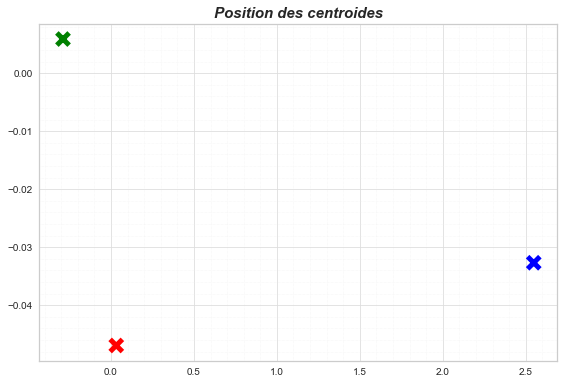

In [56]:
# Plot centroids
plt.figure()
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 150, linewidths = 5, zorder = 10, c = ['green', 'red', 'blue'])
plt.title('Position des centroides', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

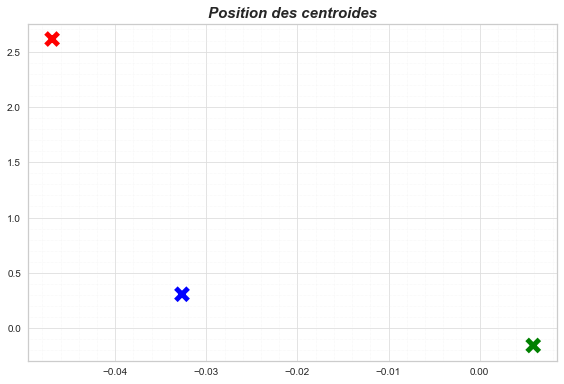

In [57]:
# Plot centroids
plt.figure()
plt.scatter(centroids[:,1], centroids[:,2], marker = 'x', s = 150, linewidths = 5, zorder = 10, c = ['green', 'red', 'blue'])
plt.title('Position des centroides', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

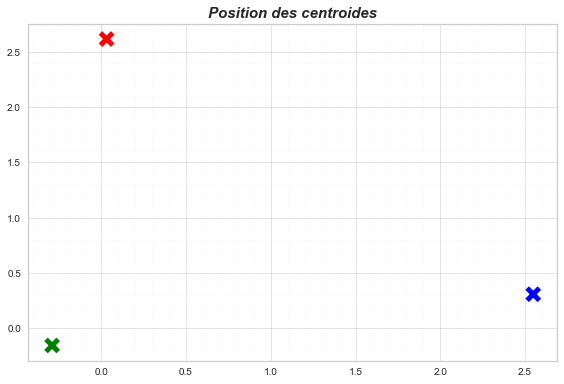

In [58]:
# Plot centroids
plt.figure()
plt.scatter(centroids[:,0], centroids[:,2], marker = 'x', s = 150, linewidths = 5, zorder = 10, c = ['green', 'red', 'blue'])
plt.title('Position des centroides', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [59]:
########## SILHOUETTE SCORE ##########
# évaluation de la qualité du clustering
# A score closer to 1 indicates that the clustering is good, while a score closer to -1 indicates that the clustering is bad.
silhouette_kmeans = round(silhouette_score(df_reduit, model.fit_predict(df_reduit)), 2)
print('The average silhouette score is:', silhouette_kmeans)

The average silhouette score is: 0.33


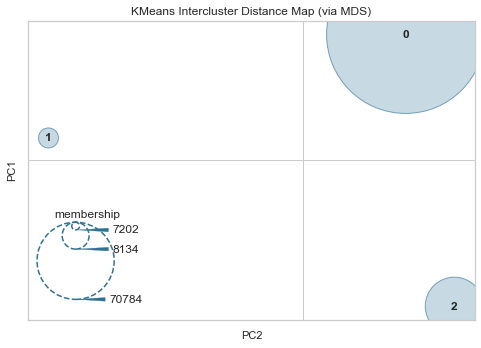

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [60]:
########## Distance intercluster ##########
# Intercluster distance Map with best k

distance_visualizer = InterclusterDistance(KMeans(k))
distance_visualizer.fit(df_reduit)
distance_visualizer.show()

In [61]:
########## CONCLUSIONS ##########
# Silhouette score de 0.28 -> bof bof
# 3 clusters bien distincts
# un des 3 clusters semble bien plus petit que les autres (en terme d'effectif)

list_methode.append('Kmeans')
list_variables.append(df_reduit.shape[1])
list_clients.append(df_reduit.shape[0])
list_n_clusters.append(3)
list_silhouette_score.append(silhouette_kmeans)

### Description des clusters

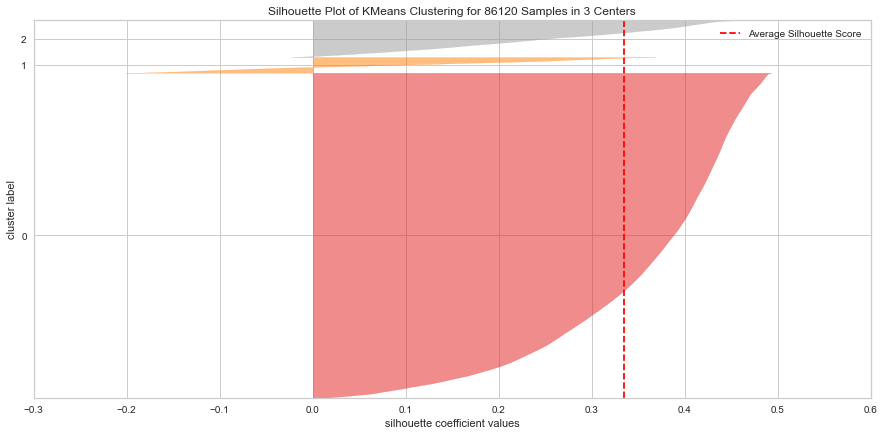

CPU times: user 4min 58s, sys: 1min 12s, total: 6min 11s
Wall time: 2min 54s


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 86120 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [62]:
%%time
########## Visualisation des clusters ##########

# Instantiate the clustering model and visualizer
visualizer = SilhouetteVisualizer(model, size = (1080, 500))

# Fit the data to the visualizer
visualizer.fit(df_reduit)

# Finalize and render the figure
visualizer.show()

In [63]:
# Créer une copie du df pour ajouter les clusters et observer leur comportement
df_clusters = df_reduit

labels = model.labels_
df_clusters['cluster_num'] = labels
df_clusters.head()

product_weight_g  payment_sequential  payment_value    review  distance  \
0         -0.365812           -0.143138      -0.658141  0.724822 -0.783157   
1          1.305305           -0.143138      -0.377872 -0.786379  0.513163   
2         -0.276487           -0.143138      -0.230308  0.724822 -1.090666   
3         -0.537018           -0.143138      -0.541615 -0.786379 -0.299902   
4         -0.443599           -0.143138       0.126602  0.724822  0.208500   

   Nb_commandes  order_item_id customer_city  payment_type  cluster_num  
0     -0.277944       1.443171             0             1            0  
1     -0.277944      -0.292940             0             1            2  
2     -0.277944       1.443171             0             1            0  
3     -0.277944      -0.292940             0             1            0  
4     -0.277944      -0.292940             0             1            0

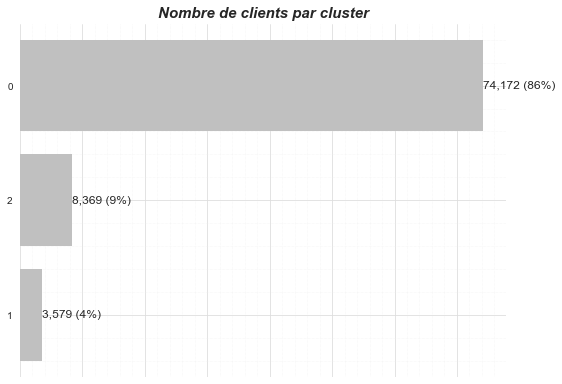

In [64]:
# Nombre de clients dans chaque cluster
segments_counts = df_clusters['cluster_num'].value_counts().sort_values(ascending = True)

# Plot
fig, ax = plt.subplots()
bars = ax.barh(
        range(len(segments_counts)),
        segments_counts,
        color = 'silver'
        )
ax.set_frame_on(False)
ax.tick_params(left = False, bottom = False, labelbottom = False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)
for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value), int(value*100/segments_counts.sum())),
                va = 'center',
                ha = 'left'
               )
plt.title('Nombre de clients par cluster', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [65]:
# Attention au volume des clusters
# si cluster avec moins de 500 individus -> risqué - clustering à revoir

In [66]:
#Autre forme de visualisation

# Isoler valeurs et labels des clusters
values = df_clusters['cluster_num'].value_counts().values
labels = df_clusters['cluster_num'].value_counts().index

# Squarify plot
plt.figure(figsize = (15, 7))
squarify.plot(
    values,
    label = labels,
    text_kwargs = {'fontsize': 13, 'color': 'black', 'fontstyle' : 'italic', 'weight' : 'bold'},
    pad = 0.10,
    color = sns.color_palette('Set2', len(values))
    )
plt.axis('off')
plt.show()

In [67]:
# Faire la moyenne pour expliquer les clusters
df_clusters.groupby('cluster_num').mean().reset_index(drop = True)

product_weight_g  payment_sequential  payment_value    review  distance  \
0         -0.289306            0.005939      -0.158976 -0.090373  0.013298   
1          0.030874           -0.047241       2.583849  2.104283  0.045550   
2          2.550835           -0.032437       0.303977 -0.098944 -0.137339   

   Nb_commandes  order_item_id  payment_type  
0     -0.131950       0.000140      0.763347  
1      3.068800       0.272253      0.646549  
2     -0.142936      -0.117666      0.764010

In [68]:
df_clusters.columns

Index(['product_weight_g', 'payment_sequential', 'payment_value', 'review',
       'distance', 'Nb_commandes', 'order_item_id', 'customer_city',
       'payment_type', 'cluster_num'],
      dtype='object')

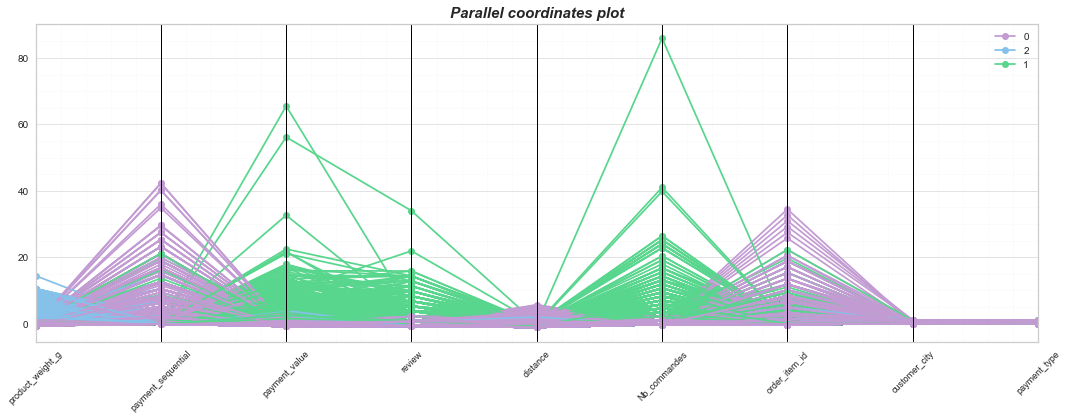

In [69]:
# Parallel_coordinates plot
# https://www.data-to-viz.com/graph/parallel.html

plt.figure(figsize = (15, 6))
pd.plotting.parallel_coordinates(df_clusters, 'cluster_num', marker = 'o', color = ['#c39bd3', '#85c1e9', '#58d68d'])
plt.xticks(fontsize = 9, rotation = 45)
plt.title('Parallel coordinates plot', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

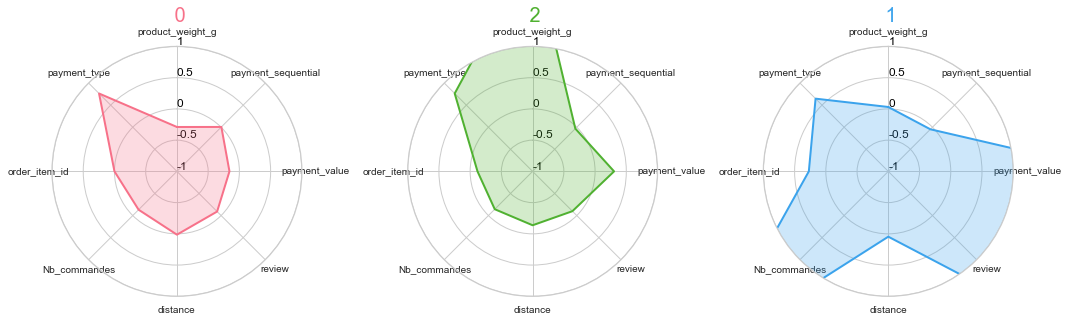

In [70]:
########## Radar plot ##########

clusters_customers = df_clusters['cluster_num'].unique()

# Liste des couleurs pour chaque segment
palette_1 = sns.color_palette('husl', len(clusters_customers))
colors = {label: color for label, color in zip(clusters_customers, palette_1.as_hex())}

# Aggrégation par moyenne des valeurs par segment (A faire pour aller plus loin -> trouver un autre moyen d'agg que la moyenne)
df_plot = df_clusters.groupby(['cluster_num']).agg('mean')

# Noms des variables
categories = list(df_plot.columns)

# Nombre de variables
N = len(categories)

# Définir l'angle entre chaque axe
# -> On divise un tour complet par le nombre de variables
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(1, figsize = (15, 15))

# Trace un radar chart pour chaque segment
for i, segment in enumerate(df_clusters['cluster_num'].unique()):
    ax = fig.add_subplot(1, 3, i + 1, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Tracer un axe par variable et ajouter les labels
    plt.xticks(angles[:-1], categories)
    plt.yticks(color = 'grey', size = 2)
    values = list(df_plot.loc[segment].values)
    values += values[:1]
    ax.plot(angles, values, colors[segment], 'o-', linewidth = 2, linestyle = 'solid')
    ax.fill(angles, values, colors[segment], alpha = 0.25)
    plt.yticks([-1, -0.5, 0, 0.5, 1], ['-1', '-0.5', '0', '0.5', '1'], color = 'black', size = 12)
    ax.set_title(f' {segment}', size = 20, color = colors[segment])
    ax.grid(True)
    plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

In [71]:
########## Nommer les clusters ##########

df_clusters['cluster_num'].replace({
    0 :'curieux', # achètent un petit produit peu cher une seule fois, ne laissent pas de commentaire, paient en une seule fois
    1 :'fidèles', # acheteurs réguliers, achètent plusieurs fois plusieurs petits produits, dépensent le plus d'argent, paient en peu de fois, laissent des reviews
    2 :'achats uniques mais volumineux' # achètent une seule fois mais un ou plusieurs produits lourds, commandes plus onéreuses que clients "curieux", paient en plusieurs fois
    }, inplace = True)

df_clusters.head()

product_weight_g  payment_sequential  payment_value    review  distance  \
0         -0.365812           -0.143138      -0.658141  0.724822 -0.783157   
1          1.305305           -0.143138      -0.377872 -0.786379  0.513163   
2         -0.276487           -0.143138      -0.230308  0.724822 -1.090666   
3         -0.537018           -0.143138      -0.541615 -0.786379 -0.299902   
4         -0.443599           -0.143138       0.126602  0.724822  0.208500   

   Nb_commandes  order_item_id customer_city  payment_type  \
0     -0.277944       1.443171             0             1   
1     -0.277944      -0.292940             0             1   
2     -0.277944       1.443171             0             1   
3     -0.277944      -0.292940             0             1   
4     -0.277944      -0.292940             0             1   

                      cluster_num  
0                         curieux  
1  achats uniques mais volumineux  
2                         curieux  
3                         curieux  
4                         curieux

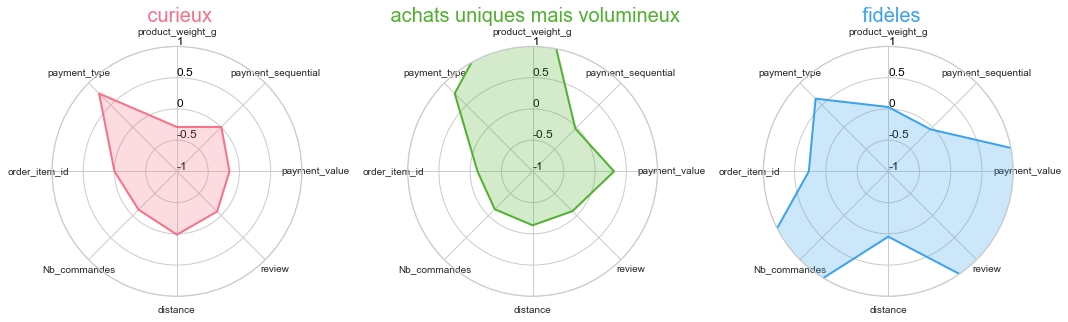

In [72]:
########## Radar plot ##########

clusters_customers = df_clusters['cluster_num'].unique()

# Liste des couleurs pour chaque segment
palette_1 = sns.color_palette('husl', len(clusters_customers))
colors = {label: color for label, color in zip(clusters_customers, palette_1.as_hex())}

# Aggrégation par moyenne des valeurs par segment (A faire pour aller plus loin -> trouver un autre moyen d'agg que la moyenne)
df_plot = df_clusters.groupby(['cluster_num']).agg('mean')

# Noms des variables
categories = list(df_plot.columns)

# Nombre de variables
N = len(categories)

# Définir l'angle entre chaque axe
# -> On divise un tour complet par le nombre de variables
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(1, figsize = (15, 15))

# Trace un radar chart pour chaque segment
for i, segment in enumerate(df_clusters['cluster_num'].unique()):
    ax = fig.add_subplot(1, 3, i + 1, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Tracer un axe par variable et ajouter les labels
    plt.xticks(angles[:-1], categories)
    plt.yticks(color = 'grey', size = 2)
    values = list(df_plot.loc[segment].values)
    values += values[:1]
    ax.plot(angles, values, colors[segment], 'o-', linewidth = 2, linestyle = 'solid')
    ax.fill(angles, values, colors[segment], alpha = 0.25)
    plt.yticks([-1, -0.5, 0, 0.5, 1], ['-1', '-0.5', '0', '0.5', '1'], color = 'black', size = 12)
    ax.set_title(f' {segment}', size = 20, color = colors[segment])
    ax.grid(True)
    plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

In [73]:
############ Description des différents clusters ##########

#### Cluster 0 = plus gros cluster, regroupe plus de 50% des clients

# Clients 'curieux'
# -> commandent 1 fois 1 produit pas cher pas lourd, paient en une fois, ne laissent pas de review

#### Cluster 2

# clients qui achètent une seule fois mais un ou plusieurs produits lourds, commandes plus onéreuses que clients "curieux", paient en plusieurs fois

#### Cluster 1

# Client 'fidèles'/'réguliers'
# acheteurs réguliers, achètent plusieurs fois plusieurs petits produits, dépensent le plus d'argent, paient en peu de fois, laissent des reviews

########## Conclusions ##########

# analyse effectuée sur la totalité du jeu de données clients
# silhouette score bas mais acceptable
# comportements clients bien définis

In [74]:
df_clusters.columns

Index(['product_weight_g', 'payment_sequential', 'payment_value', 'review',
       'distance', 'Nb_commandes', 'order_item_id', 'customer_city',
       'payment_type', 'cluster_num'],
      dtype='object')

In [75]:
# Cluster interpretation

# https://python.plainenglish.io/a-comprehensive-guide-to-customer-segmentation-in-python-with-kmeans-a04068f8c3c
# https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering
# à lire

## DBSCAN

In [76]:
# DBSCAN = Density Based Spatial Clustering of Applications with Noise

# https://datascientest.com/machine-learning-clustering-dbscan#:~:text=Le%20DBSCAN%20est%20un%20algorithme%20simple%20qui%20d%C3%A9finit%20des%20clusters,estimation%20de%20la%20densit%C3%A9%20locale.
# Le DBSCAN est un algorithme simple qui définit des clusters en utilisant l’estimation de la densité locale

# https://www.reneshbedre.com/blog/dbscan-python.html

### Choix des paramètres

In [77]:
# Impossible de faire une gridsearchcv pour dbscan car pas de méthode de scoring
### https://stackoverflow.com/questions/25633383/how-can-gridsearchcv-be-used-for-clustering-meanshift-or-dbscan

# Paramètres à définir : epsilon et min_samples
# itérer sur valeurs de epsilon et de min_samples et voir le nb de clusters obtenus ainsi que leurs effectifs

In [78]:
df_dbscan = df_sampled.copy()

In [79]:
########## min_samples ##########
# min_samples -> nombre minimum requis de points dans ce cercle pour que le point soit classifié comme point 'core'

# min_samples = 2 * number of dimensions
min_samples = 2 * df_dbscan.shape[1]
min_samples

18

In [80]:
########## Epsilon ##########
# epsilon -> rayon du cercle créé autour de chaque point pour checker densité

pd.np.arange(0.1, 7, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9])

In [81]:
%time

# Test sur jeu de données complet -> kernel crash
# Test sur jeu données sous-échantillonné :
dbscan_clusters = []
list_epsilon = pd.np.arange(0.1, 7, 0.1)
list_min_samples = [5, 10, 50, 100, 200]

n_iterations = 0
for eps_val in list_epsilon:
    for min_s in list_min_samples:
        dbscan_grid = DBSCAN(eps = eps_val, min_samples = min_s)
        # fit transform
        clusters = dbscan_grid.fit_predict(X = df_dbscan)
        # saving the number of clusters
        n_clusters = len(set(clusters)) - 1
        # counting the amount of data in each clusters
        cluster_count = Counter(clusters)
        # inscrising n iter
        n_iterations += 1
        # concerver valeurs pour lesquelles on obtient 2 à 9 clusters contenants au moins 500 individus
        if n_clusters > 2 and n_clusters < 15 and all(element >= 500 for element in [cluster_count[c] for c in cluster_count.keys()]):
            #print(f'Conditions vérifiée !! Paramètres epsilon = {eps_val}, min_samples = {min_s} ')
            dbscan_clusters.append([eps_val, min_s, n_clusters, cluster_count])
        else:
            pass
            #print(f'Paramètres epsilon = {eps_val}, min_samples = {min_s} non retenus - {n_clusters} clusters, balance : {cluster_count}')

print(f"Nombre d'itérations effectuées : {n_iterations}")
print('Paramètres et nombre de clusters retenus :')
dbscan_clusters

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.29 µs
Nombre d'itérations effectuées : 345
Paramètres et nombre de clusters retenus :


[]

In [82]:
# '-1' value represents noisy points could not assigned to any cluster

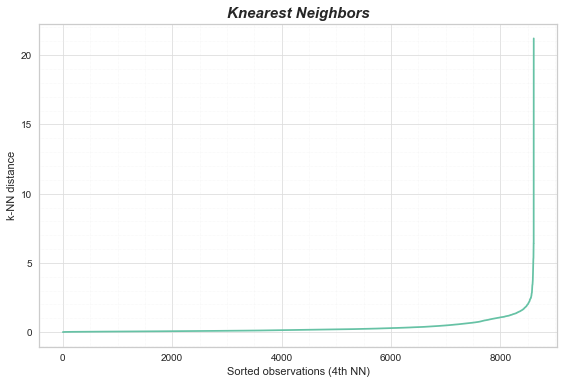

In [83]:
########## Autre façon de déterminer epsilon ##########
# NearestNeighbors et KneeLocator

########## NearestNeighbors ###########
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros)
nbrs = NearestNeighbors(n_neighbors = 3).fit(df_dbscan)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df_dbscan)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 2]
plt.plot(k_dist)
plt.title('Knearest Neighbors', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.ylabel('k-NN distance')
plt.xlabel('Sorted observations (4th NN)')
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

Estimation du point d'inflexion (coude): 4.125011673098557


<Figure size 576x396 with 0 Axes>

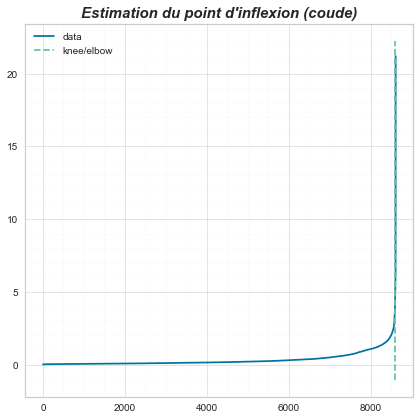

In [84]:
########## KneeLocator ##########
kneedle = KneeLocator(
    x = range(1, len(neigh_dist) + 1),
    y = k_dist,
    S = 1.0,
    curve = 'concave',
    direction = 'increasing',
    online = True
    )

# get the estimate of knee point
print(f"Estimation du point d'inflexion (coude): {kneedle.knee_y}")

# Plot
plt.figure()
kneedle.plot_knee()
plt.title("Estimation du point d'inflexion (coude)", fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [85]:
# puis utiliser cet optimum pour le dbscan clustering
eps = kneedle.knee_y
eps

4.125011673098557

### Dbscan

In [86]:
df_dbscan.columns

Index(['product_weight_g', 'payment_sequential', 'payment_value', 'review',
       'distance', 'Nb_commandes', 'order_item_id', 'customer_city',
       'payment_type'],
      dtype='object')

In [87]:
# pas de paramètres satisfaisants retenus avec méthodes précédantes... tester néamoins avec
eps = 0.5
min_samples = 100

In [88]:
db = DBSCAN(eps = eps, min_samples = min_samples).fit(df_dbscan)

# get cluster labels
db_labels = db.labels_
db_labels

array([-1, -1,  4, ..., -1, -1, -1])

In [89]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 4767


In [90]:
# check unique clusters
set(db_labels) # -1 value represents noisy points could not assigned to any cluster

{-1, 0, 1, 2, 3, 4}

In [91]:
# Get each cluster size
Counter(db_labels)

Counter({-1: 4767, 4: 222, 0: 1808, 1: 1115, 2: 426, 3: 274})

In [92]:
y_pred = DBSCAN(eps = eps, min_samples = min_samples).fit_predict(df_dbscan)
y_pred

array([-1, -1,  4, ..., -1, -1, -1])

In [93]:
# Evaluation du clustering : silhouette score
silhouette_dbscan = round(silhouette_score(df_dbscan, y_pred), 2)
print('The average silhouette score is:', silhouette_dbscan)

The average silhouette score is: -0.03


In [94]:
df_dbscan

product_weight_g  payment_sequential  payment_value    review  distance  \
0            -0.574236           -0.143138      -0.672755 -0.786379  0.979350   
1            -0.378839           -0.143138      -0.025947 -0.786379 -0.229303   
2            -0.518408           -0.143138      -0.239106 -0.786379 -0.503987   
3            -0.406752            1.979736      -0.363306 -0.786379 -0.286663   
4            -0.544461           -0.143138      -0.643037 -0.786379 -1.016612   
...                ...                 ...            ...       ...       ...   
8607         -0.590240           -0.143138      -0.424209  0.724822  0.112824   
8608         -0.388143           -0.143138       3.746294 -0.786379 -0.447018   
8609         -0.202050            1.979736      -0.363306 -0.786379  0.923694   
8610         -0.376978           -0.143138       8.688733 -0.786379 -0.837016   
8611         -0.546322           -0.143138      -0.214178  0.724822  0.786290   

      Nb_commandes  order_item_id customer_city  payment_type  
0        -0.277944      -0.292940             0             0  
1         0.936986      -0.292940             0             1  
2        -0.277944      -0.292940             1             1  
3        -0.277944      -0.292940             0             1  
4        -0.277944      -0.292940             0             1  
...            ...            ...           ...           ...  
8607     -0.277944      -0.292940             0             1  
8608     -0.277944       4.915393             0             1  
8609     -0.277944      -0.292940             1             1  
8610     -0.277944      -0.292940             0             1  
8611      0.936986       0.575116             0             1  

[8612 rows x 9 columns]

In [95]:
X = StandardScaler().fit_transform(df_dbscan)

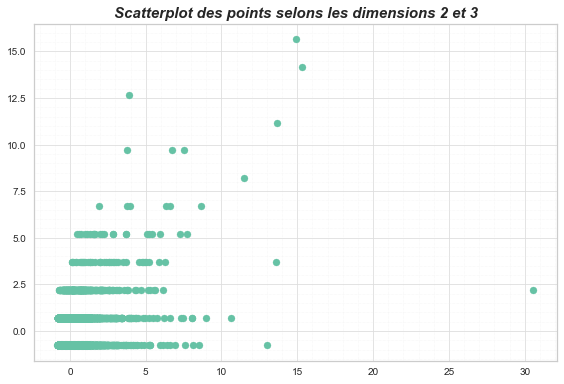

In [96]:
plt.figure()
plt.scatter(X[:, 2], X[:, 3])
plt.title('Scatterplot des points selons les dimensions 2 et 3', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

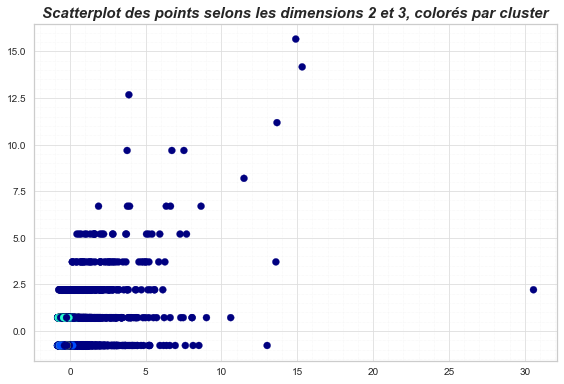

In [97]:
plt.figure()
plt.scatter(
    X[:, 2],
    X[:, 3],
    c = y_pred,
    cmap = plt.get_cmap('jet')
    )
plt.title('Scatterplot des points selons les dimensions 2 et 3, colorés par cluster', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

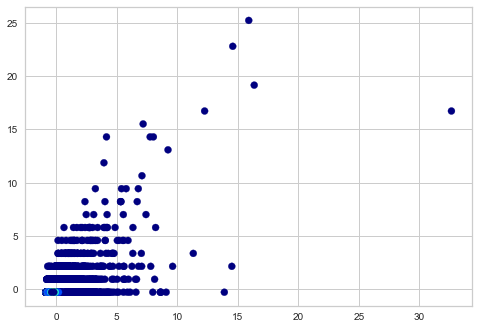

In [98]:
plt.figure()
plt.scatter(
    df_dbscan['payment_value'],
    df_dbscan['Nb_commandes'],
    c = y_pred,
    cmap = plt.get_cmap('jet')
    )
plt.show()

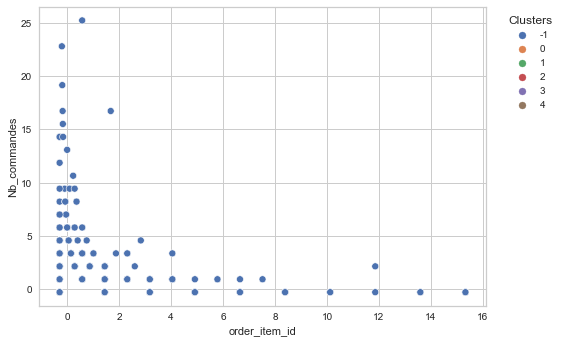

In [99]:
plt.figure()
p = sns.scatterplot(
    data = df_dbscan,
    x = 'order_item_id',
    y = 'Nb_commandes',
    hue = db_labels,
    legend = 'full',
    palette = 'deep'
    )
sns.move_legend(p, 'upper right', bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [100]:
########## Conclusions ##########

# de base pas adapté car obligé d'utiliser un jeu de données réduit (df_sampled)

list_methode.append('DBSCAN')
list_variables.append(df_dbscan.shape[1])
list_clients.append(df_dbscan.shape[0])
list_n_clusters.append(5)
list_silhouette_score.append(silhouette_dbscan)

## Spectral clustering

In [101]:
df_spectral = df_sampled.copy()

In [102]:
%%time
# affinity matrix avec kernel Gaussien
# -> 'affinity' = 'rbf'

# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity = 'rbf')

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(df_spectral)

CPU times: user 6min 55s, sys: 8.84 s, total: 7min 3s
Wall time: 7min 20s


In [103]:
# Evaluation du clustering : silhouette score
silhouette_spectral_rbf = round(silhouette_score(df_spectral, labels_rbf), 2)
print('The average silhouette score is:', silhouette_spectral_rbf)

The average silhouette score is: 0.91


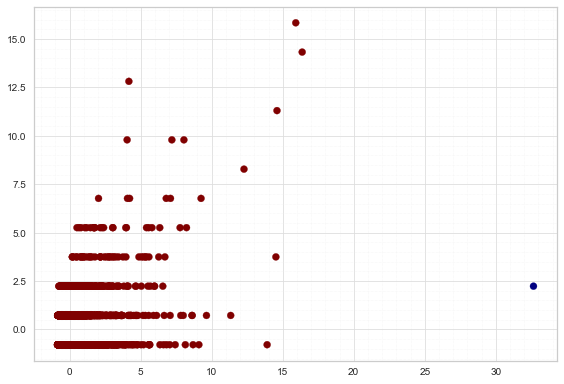

In [104]:
# Visualizing the clustering (MANQUE TITRE)
plt.figure()
plt.scatter(
    df_spectral['payment_value'],
    df_spectral['review'],
    c = SpectralClustering(n_clusters = 4, affinity = 'rbf').fit_predict(df_spectral),
    cmap = plt.get_cmap('jet')
    )
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [105]:
%%time
# -> affinity = ‘nearest_neighbors’

# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors')

# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(df_spectral)

CPU times: user 3.51 s, sys: 872 ms, total: 4.38 s
Wall time: 2.92 s


In [106]:
# Evaluation du clustering : silhouette score
silhouette_spectral_nn = round(silhouette_score(df_spectral, labels_nn), 2)
print('The average silhouette score is:', silhouette_spectral_nn)

The average silhouette score is: 0.14


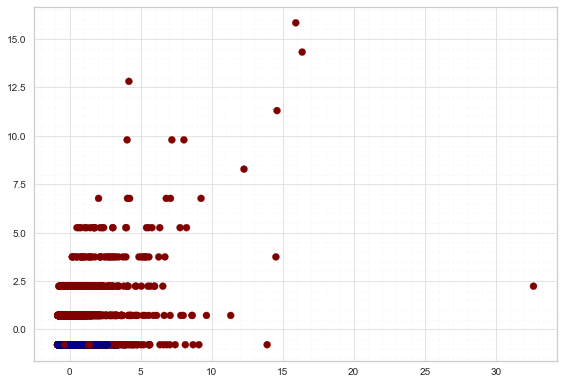

In [107]:
# Visualizing the clustering (MANQUE TITRE)
plt.figure()
plt.scatter(
    df_spectral['payment_value'],
    df_spectral['review'],
    c = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors').fit_predict(df_spectral),
    cmap = plt.get_cmap('jet')
    )
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [108]:
# Evaluer performances

# List of different values of affinity
affinity = ['rbf', 'nearest-neighbours']

# List of Silhouette Scores
s_scores = []

# Evaluating the performance
s_scores.append(silhouette_score(df_spectral, labels_rbf))
s_scores.append(silhouette_score(df_spectral, labels_nn))

print(s_scores)

[0.9143826699778712, 0.14198012135359764]


In [109]:
########## Conclusions ##########

list_methode.append('Spectral clustering')
list_variables.append(df_spectral.shape[1])
list_clients.append(df_spectral.shape[0])
list_n_clusters.append(5)
list_silhouette_score.append(silhouette_spectral_nn)

## Agglomerative clustering

In [110]:
# = clustering hiérarchique
# algo forme clusters en mesurant dissimilarité entre les données

df_agglomerative = df_sampled.copy()

In [111]:
# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage = 'ward',
    compute_full_tree = True
    )

In [115]:
%time

# Test sur jeu de données complet -> kernel crash
# Test sur jeu données sous-échantillonné :
agglo_clusters = []
list_metric = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'precomputed'], # nouveau nom de 'affinity'
list_linkage = ['ward', 'complete', 'average', 'single']

n_iterations = 0
for m in list_metric:
    for l in list_linkage:
        hiercluster_grid = AgglomerativeClustering(affinity = m, linkage = l)
        # fit transform
        clusters = hiercluster_grid.fit_predict(X = df_agglomerative)
        # saving the number of clusters
        n_clusters = len(set(clusters))
        # counting the amount of data in each clusters
        cluster_count = Counter(clusters)
        # inscrising n iter
        n_iterations += 1
        # concerver valeurs pour lesquelles on obtient 2 à 9 clusters contenants au moins 500 individus
        if n_clusters > 2 and n_clusters < 15 and all(element >= 500 for element in [cluster_count[c] for c in cluster_count.keys()]):
            #print(f'Conditions vérifiée !! Paramètres epsilon = {eps_val}, min_samples = {min_s} ')
            agglo_clusters.append([m, l, n_clusters, cluster_count])
        else:
            pass
            #print(f'Paramètres epsilon = {eps_val}, min_samples = {min_s} non retenus - {n_clusters} clusters, balance : {cluster_count}')

print(f"Nombre d'itérations effectuées : {n_iterations}")
print('Paramètres et nombre de clusters retenus :')
agglo_clusters

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.25 µs


TypeError: 2nd argument metric must be a string identifier or a function.

In [116]:
# Test avec jeu de données complet (df_reduit) -> kernel crashed while executing code
# Test avec jeu de données échantillonné (df_sampled):

# Fit the data to the model and determine which clusters each data point belongs to:
hiercluster.set_params(n_clusters = 3) # pour trouver 3 clusters
clusters_3 = hiercluster.fit_predict(df_agglomerative)
np.bincount(clusters_3) # count of data points in each cluster

array([7731,  144,  737])

In [117]:
# Evaluation du clustering : silhouette score
silhouette_agglo_3 = round(silhouette_score(df_agglomerative, clusters_3), 2)
print('The average silhouette score is:', silhouette_agglo_3)

The average silhouette score is: 0.31


In [118]:
# Read off 5 clusters:
hiercluster.set_params(n_clusters = 5)
clusters_5 = hiercluster.fit_predict(df_agglomerative)
np.bincount(clusters_5)

array([6933,  144,  737,  748,   50])

In [119]:
# Evaluation du clustering : silhouette score
silhouette_agglo_5 = round(silhouette_score(df_agglomerative, clusters_5), 2)
print('The average silhouette score is:', silhouette_agglo_5)

The average silhouette score is: 0.31


In [120]:
# Add cluster number to the original data
df_sampled_clustered = pd.DataFrame(
    df_agglomerative,
    columns = df_agglomerative.columns,
    index = df_agglomerative.index
    )

df_sampled_clustered['cluster'] = clusters_5
df_sampled_clustered.head()

product_weight_g  payment_sequential  payment_value    review  distance  \
0         -0.574236           -0.143138      -0.672755 -0.786379  0.979350   
1         -0.378839           -0.143138      -0.025947 -0.786379 -0.229303   
2         -0.518408           -0.143138      -0.239106 -0.786379 -0.503987   
3         -0.406752            1.979736      -0.363306 -0.786379 -0.286663   
4         -0.544461           -0.143138      -0.643037 -0.786379 -1.016612   

   Nb_commandes  order_item_id customer_city  payment_type  cluster  
0     -0.277944       -0.29294             0             0        0  
1      0.936986       -0.29294             0             1        0  
2     -0.277944       -0.29294             1             1        0  
3     -0.277944       -0.29294             0             1        0  
4     -0.277944       -0.29294             0             1        0

In [121]:
# Find the size of the clusters
df_sampled_clustered['cluster'].value_counts()

0    6933
3     748
2     737
1     144
4      50
Name: cluster, dtype: int64

In [122]:
# regarder si imbalanced ou non

In [123]:
def plot_dendrogram(Z, names, figsize = (10, 25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize = figsize)
    plt.title('Hierarchical Clustering Dendrogram', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = 'left',
    )
    plt.show()

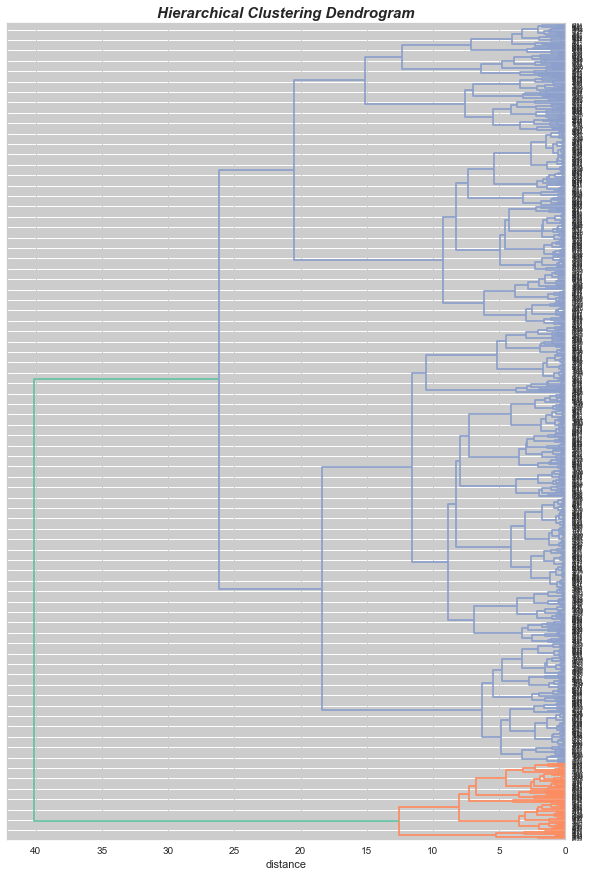

In [124]:
# Show a dendrogram, just for the first smallest cluster

sample = df_sampled_clustered[df_sampled_clustered.cluster == 2] # prendre le cluster 2 car celui avec le moins d'échantillons donc sera plus lisible
Z = linkage(sample, 'ward')
names = sample.index
plot_dendrogram(Z, names, figsize = (10, 15))

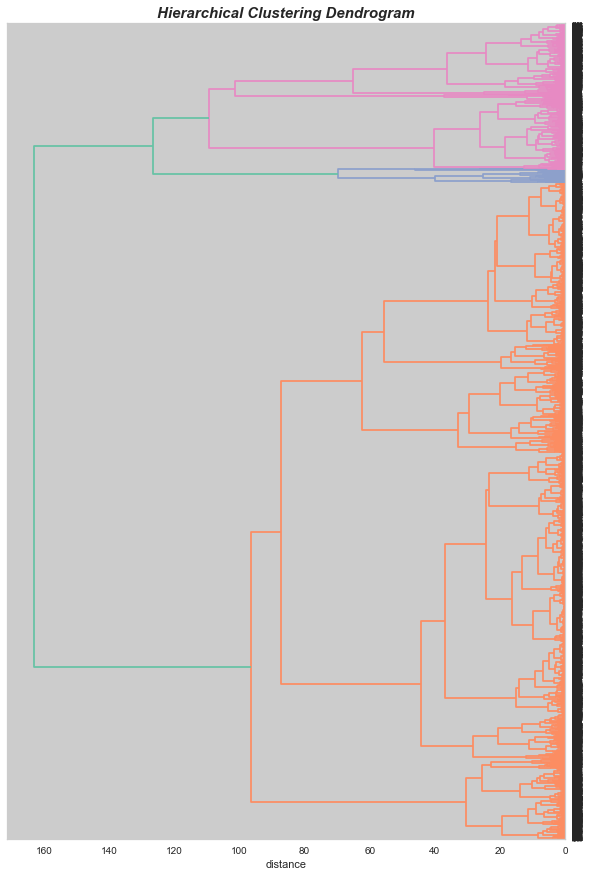

In [125]:
sample = df_agglomerative
Z = linkage(sample, 'ward')
names = sample.index
plot_dendrogram(Z, names, figsize = (10, 15))

Locator attempting to generate 43060 ticks ([1.0, ..., 86119.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 43060 ticks ([1.0, ..., 86119.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 43060 ticks ([1.0, ..., 86119.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 43060 ticks ([1.0, ..., 86119.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 43060 ticks ([1.0, ..., 86119.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 43060 ticks ([1.0, ..., 86119.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 43060 ticks ([1.0, ..., 86119.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 43060 ticks ([1.0, ..., 86119.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 43060 ticks ([1.0, ..., 86119.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 43060 ticks ([1.0, ..., 

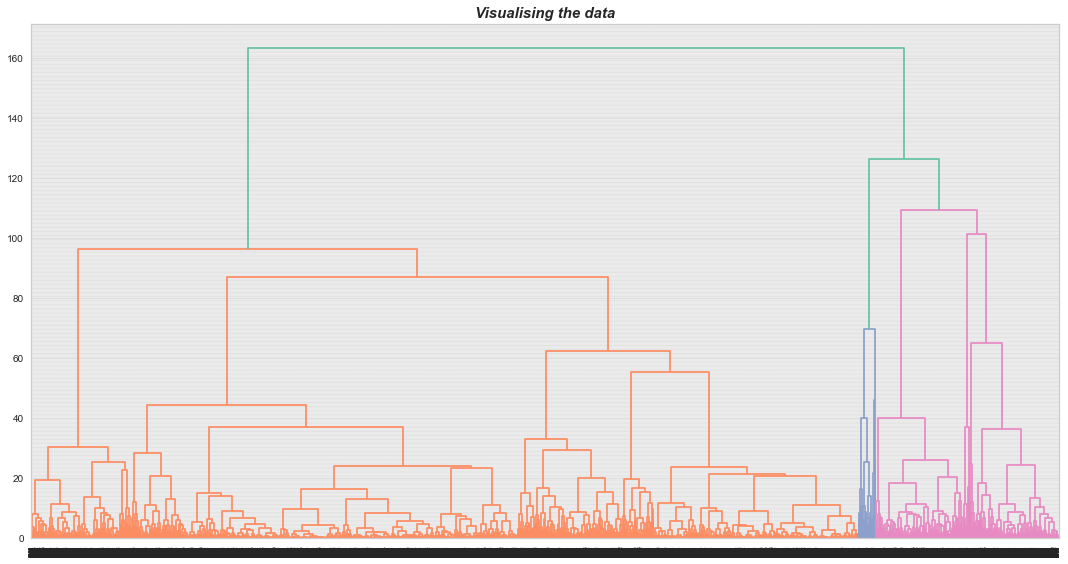

In [126]:
plt.figure(figsize = (15, 8))
plt.title('Visualising the data', fontweight = 'bold', fontstyle = 'italic', fontsize = 15)
Dendrogram = shc.dendrogram((shc.linkage(df_agglomerative, method = 'ward')))
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [127]:
########## Conclusions ##########

# résultat doit être à peu près similaire à ce qu'on option avec kmeans
# or on a du beaucoup réduire jeu de données donc trop contraignant donc pas adapté à notre situation donc on abandonne

list_methode.append('Agglomerative clustering')
list_variables.append(df_agglomerative.shape[1])
list_clients.append(df_agglomerative.shape[0])
list_n_clusters.append(5)
list_silhouette_score.append(silhouette_agglo_5)

## Comparaison des méthodes de clustering

In [128]:
df_comparaison = pd.DataFrame()
df_comparaison['Méthode'] = list_methode
df_comparaison['Nb de variables'] = list_variables
df_comparaison['Nb clients'] = list_clients
df_comparaison['Nb clusters'] = list_n_clusters
df_comparaison['Silhouette score'] = list_silhouette_score

df_comparaison

Méthode  Nb de variables  Nb clients  Nb clusters  \
0                       RFM               42      118686            7   
1                    Kmeans                9       86120            3   
2                    DBSCAN                9        8612            5   
3       Spectral clustering                9        8612            5   
4  Agglomerative clustering               10        8612            5   

   Silhouette score  
0               NaN  
1              0.33  
2             -0.03  
3              0.14  
4              0.31

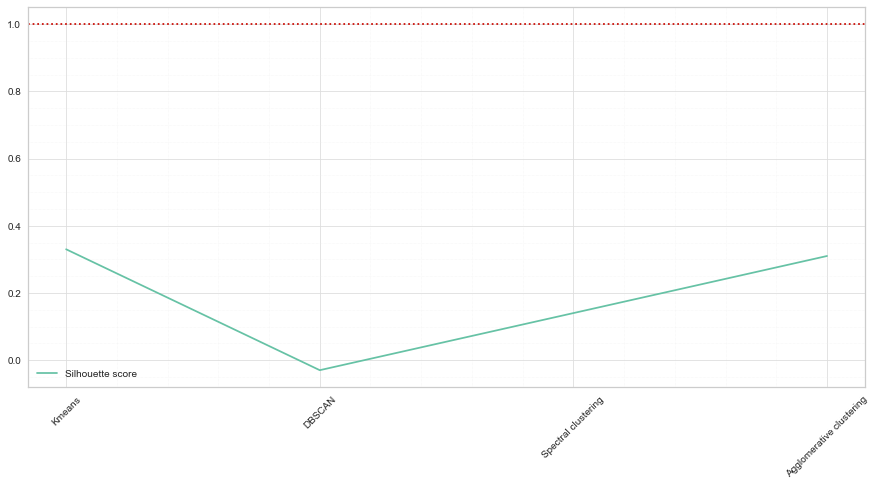

In [131]:
# plot results
plt.figure(figsize = (15, 7))
plt.plot(df_comparaison['Méthode'], df_comparaison['Silhouette score'], label = i)
plt.axhline(y = 1, color = 'r', linestyle = ':')
plt.legend(loc = 'best')
plt.grid(which = 'major', color = '#DDDDDD', linewidth = 0.8)
plt.grid(which = 'minor', color = '#EEEEEE', linestyle = ':', linewidth = 0.5)
plt.minorticks_on()
plt.xticks(rotation = 45)
plt.show()